In [8]:
import os
import torch
import pickle
from matplotlib import pyplot as plt

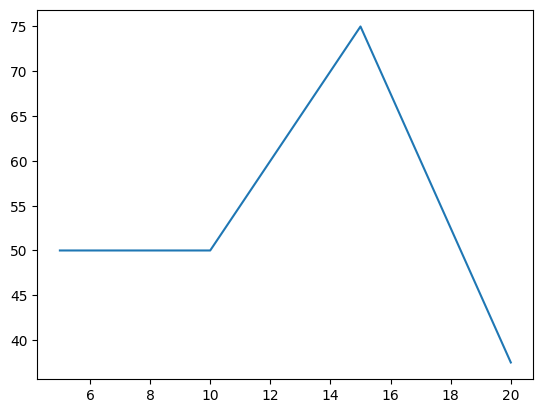

In [15]:
output_dir = '../data/outputs'
training_name = '2024-05-10T17-04-36_imagenet-1024'
filename = os.path.join(output_dir, training_name, 'classification/predictions')

with open(filename, 'rb') as f:
    data = pickle.load(f)

def acc(y, yhat):
    return 100. * torch.sum(y == yhat) / yhat.shape[0]

t, score = [], []

for e in data.keys():
    y = torch.tensor(data[e]['y'])
    l1_pred = torch.tensor(data[e]['l1_pred'])
    l2_pred = torch.tensor(data[e]['l2_pred'])

    best = max(acc(l1_pred, y), acc(l2_pred, y))
    t.append(e)
    score.append(best)

training_samples = training_name.split('_')[-1].split('-')[-1]

plt.plot(t, score, label=training_samples)
plt.show()

In [2]:
# confusion matrix plotter

from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def labels_to_human_labels(labels, human_labels_list):
    human_labels = [human_labels_list[int(x.detach().cpu().numpy())] for x in labels]  
    return human_labels

def plot_confusion_matrix(true_labels, labels_pred, human_labels_list):
    true_labels_readable = labels_to_human_labels(true_labels, human_labels_list)
    labels_pred_readable = labels_to_human_labels(labels_pred, human_labels_list)
    cm = confusion_matrix(true_labels_readable, labels_pred_readable, labels=human_labels_list)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=human_labels_list)
    fig, ax = plt.subplots(figsize=(12,12))
    disp.plot(ax=ax)
    plt.show()

ModuleNotFoundError: No module named 'sklearn'